### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Dropping irrelevant features

In [3]:
df.drop(['Name'],axis=1,inplace=True)

In [4]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

### Checking for null values

In [5]:
df.isnull().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

### One hot encoding for Sex column

In [6]:
df=pd.get_dummies(df,'Sex')
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


### Visualizing data

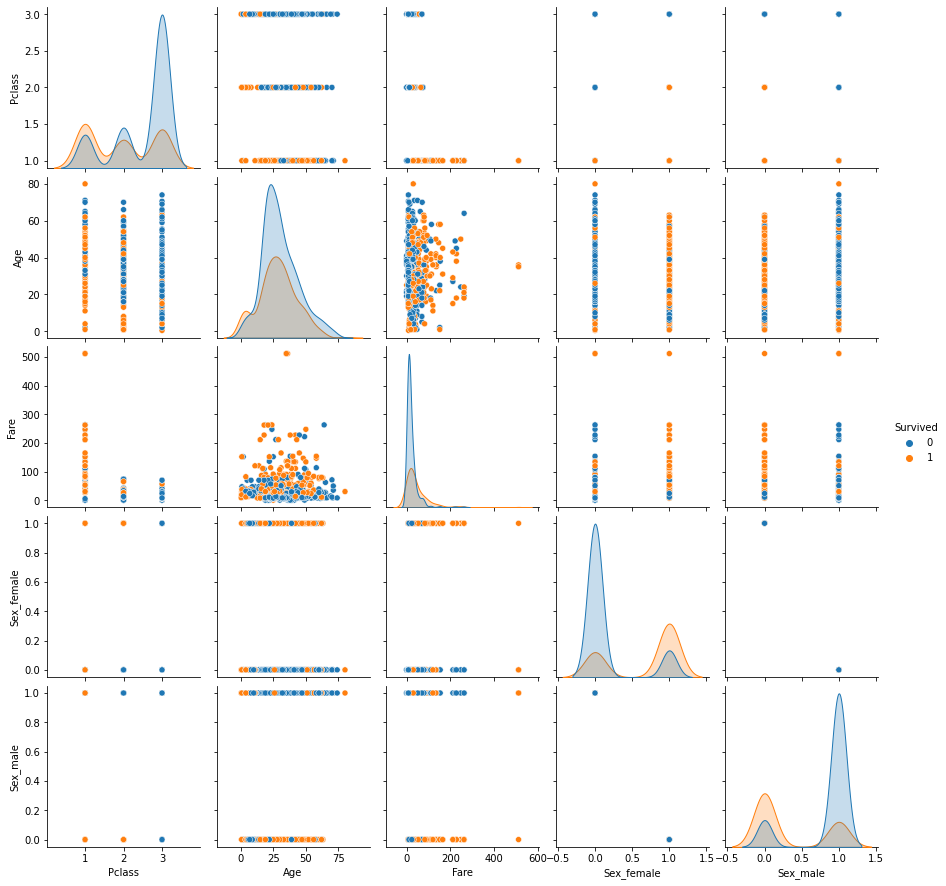

In [7]:
import seaborn as sns
sns.pairplot(df,hue='Survived',vars=['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male'])

### Dropping irrelevant features

In [8]:
df.drop('Fare',axis=1,inplace=True)

### Separating dependant and independant values

In [9]:
X=df.drop('Survived',axis=1).values
y=df.Survived.values

### Train-Test split

In [10]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Performing stratifiedShuffleSplit as it gives good accuracy

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [851 650 103 101 292 233 763 873 249 513 133 684 764  73 278 476  84 552
 116 416 114 869  32 836 617  34 570 743 296  43  12  70 707 169 451 631
 202 170 283 680 368 366 354 323 326 147 669 260 710 231 271 230  76 719
 297 579 344 733 243 592 521 156 862 338 182 432 317 256 768 172 383 752
 362 847 880 563  60 122 659 148 167 193 507  57  42 653 149 489 739 823
  30 721 402 522  64 842 623 251 421 375 270 791 261 183 207  51 306 123
 120 221 690   6 181 574 668  21 799 205  19 177 551 867 503 211 716 675
 253 357 291 786 441 403 647 259  14 846 280 315 186 213 429 614 248 597
 693 670 189 599 427 466 409  59 603 484 388 346 299 742 347 369 827 741
 400 459 750 534 825 341 389 613 886 735 718 228 304 553 179 350 112 723
 639 640 225 547 219 812 281 482 168   3 294 111 530 784 855 267 372 625
 830 478 405 159 866 645 657 520 528  18 130 697 801 822 265 322 759 371
 810 634  35 217 391  93 711 702   8   2 746 140 760 562  68 113 163 654
 234 587 417 516 330 612 809 772 309 883 785

### Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression()
Log.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_hat=Log.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test,y_hat)

0.7865168539325843

### Fitting SVM 

In [17]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [18]:
y_pr=svc.predict(X_test)

In [19]:
accuracy_score(y_test,y_pr)

0.8146067415730337

####  We are going to use SVM algorithm as it gives better accuracy than Logistic Regression